In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [3]:
df = pd.read_csv('Merged_HR_Training_Data1.csv')

In [4]:
X = df[['MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'PerformanceRating', 'OverTime', 
        'DistanceFromHome', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'YearsSinceLastPromotion', 'Age']]
y = df['Attrition-Label']


In [5]:
X = pd.get_dummies(X, columns=['OverTime'], drop_first=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy with Additional Features (YearsSinceLastPromotion & Age): {rf_accuracy:.2f}")

Random Forest Accuracy with Additional Features (YearsSinceLastPromotion & Age): 0.79


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [10]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30],        
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],    
    'bootstrap': [True, False]        
}

In [11]:
rf = RandomForestClassifier(random_state=42)

In [12]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [13]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [14]:
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
print(f"Random Forest Accuracy after Hyperparameter Tuning: {best_rf_accuracy:.2f}")

Random Forest Accuracy after Hyperparameter Tuning: 0.79


In [15]:
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [16]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                   Feature  Importance
3        PerformanceRating    0.189471
0            MonthlyIncome    0.157280
8                      Age    0.133655
4         DistanceFromHome    0.127740
1           YearsAtCompany    0.120265
7  YearsSinceLastPromotion    0.096180
2          JobSatisfaction    0.053136
5  EnvironmentSatisfaction    0.052321
6          WorkLifeBalance    0.051446
9             OverTime_Yes    0.018506


In [17]:
df = pd.read_csv('Merged_HR_Training_Data1.csv')

In [18]:
X = df[['PerformanceRating', 'MonthlyIncome', 'Age', 'DistanceFromHome', 
        'YearsAtCompany', 'YearsSinceLastPromotion']]
y = df['Attrition-Label']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
rf_pred = rf_model.predict(X_test)

In [22]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy after Refinement: {rf_accuracy:.2f}")

Random Forest Accuracy after Refinement: 0.78


In [23]:
print(df['Attrition-Label'].unique())
df['Attrition-Label'] = df['Attrition-Label'].replace({'Yes': 1, 'No': 0})
promotion_attrition = df.groupby('YearsSinceLastPromotion')['Attrition-Label'].mean()
print(promotion_attrition)

['Yes' 'No']
YearsSinceLastPromotion
0     0.240989
1     0.196447
2     0.344234
3     0.455041
4     0.325815
5     0.343931
6     0.415584
7     0.398058
8     0.411765
9     0.482394
10    0.473118
11    0.366337
12    0.430769
13    0.430556
14    0.511945
15    0.374517
Name: Attrition-Label, dtype: float64


In [27]:
import matplotlib.pyplot as plt

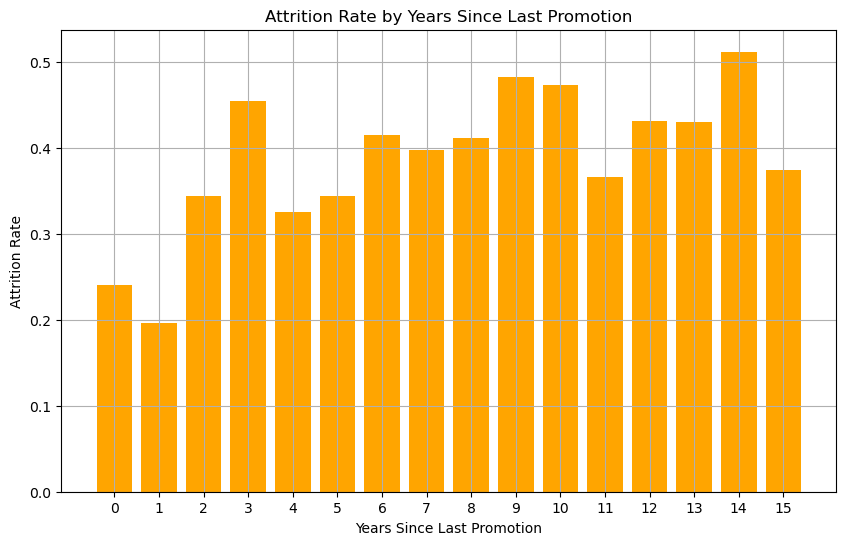

In [28]:
years_since_last_promotion = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
attrition_rates = [0.240989, 0.196447, 0.344234, 0.455041, 0.325815, 0.343931, 0.415584, 0.398058, 
                   0.411765, 0.482394, 0.473118, 0.366337, 0.430769, 0.430556, 0.511945, 0.374517]

plt.figure(figsize=(10, 6))
plt.bar(years_since_last_promotion, attrition_rates, color='orange')
plt.title('Attrition Rate by Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Attrition Rate')
plt.xticks(years_since_last_promotion)  # Set x-axis labels to match the data
plt.grid(True)

# Show the graph
plt.show()